In [1]:
pip install fer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 812 kB 5.1 MB/s 
     |████████████████████████████████| 2.3 MB 34.2 MB/s 


In [2]:
from fer import FER
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
import pickle
import json
import pandas as pd

In [158]:
#ler imagens de uma vez só
total_de_imagens = 20
endereco = '/content/dataSet-surpresa/'
imagens = []
for i in range(total_de_imagens):
  imagem = imread(endereco+'img'+str(i+1)+'.jpg')
  imagens.append(imagem)
#test_image = plt.imread("/content/euSorrindo.jpeg")

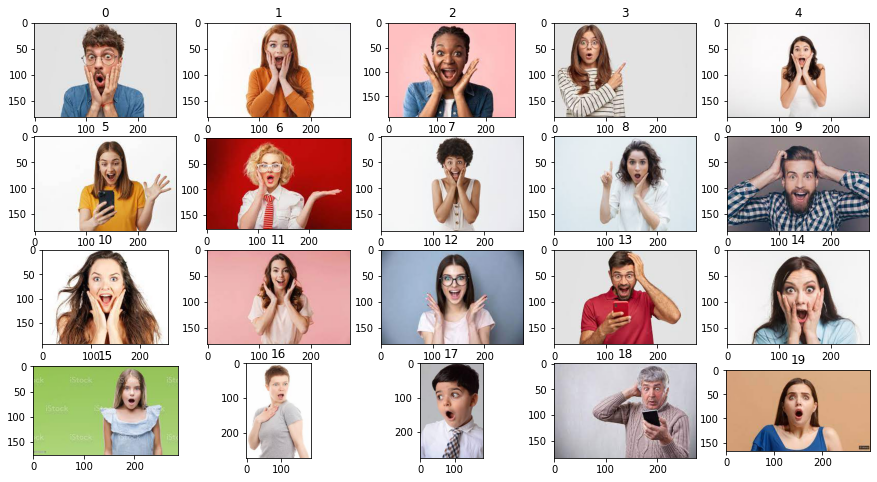

In [159]:
figura = plt.figure(figsize=(15, 8))
for i in range(total_de_imagens):
  figura.add_subplot(4, 5, i+1)
  plt.imshow(imagens[i])
  plt.title(i)
plt.show()

In [160]:
detector = FER(mtcnn=True)

In [161]:
try:
  print('IMPRIMINDO ANÁLISE GERAL DE TODAS AS EMOÇÕES')
  lista_todas_emocoes_geral = []
  for i in range(total_de_imagens):
    analise = detector.detect_emotions(imagens[i])
    lista_todas_emocoes_geral.append(analise)
    print(analise)
except:
  print('No face detected')
#captured_emotions = emo_detector.detect_emotions(test_image)

IMPRIMINDO ANÁLISE GERAL DE TODAS AS EMOÇÕES
[{'box': [98, 36, 66, 99], 'emotions': {'angry': 0.02, 'disgust': 0.0, 'fear': 0.44, 'happy': 0.0, 'sad': 0.0, 'surprise': 0.53, 'neutral': 0.0}}]
[{'box': [116, 20, 45, 68], 'emotions': {'angry': 0.0, 'disgust': 0.0, 'fear': 0.04, 'happy': 0.0, 'sad': 0.0, 'surprise': 0.96, 'neutral': 0.0}}]
[{'box': [90, 26, 71, 96], 'emotions': {'angry': 0.44, 'disgust': 0.0, 'fear': 0.14, 'happy': 0.23, 'sad': 0.0, 'surprise': 0.16, 'neutral': 0.03}}]
[{'box': [45, 17, 44, 62], 'emotions': {'angry': 0.01, 'disgust': 0.0, 'fear': 0.42, 'happy': 0.0, 'sad': 0.0, 'surprise': 0.56, 'neutral': 0.0}}]
[{'box': [126, 36, 34, 48], 'emotions': {'angry': 0.0, 'disgust': 0.0, 'fear': 0.07, 'happy': 0.0, 'sad': 0.0, 'surprise': 0.93, 'neutral': 0.0}}]
[{'box': [126, 31, 41, 60], 'emotions': {'angry': 0.01, 'disgust': 0.0, 'fear': 0.01, 'happy': 0.08, 'sad': 0.0, 'surprise': 0.9, 'neutral': 0.0}}]
[{'box': [101, 35, 46, 62], 'emotions': {'angry': 0.13, 'disgust': 0.0

In [162]:
lista_simplificada = []
for i in range(total_de_imagens):
  emotion, score = detector.top_emotion(imagens[i])
  result = emotion, score
  lista_simplificada.append(result)
  print(result)

('surprise', 0.53)
('surprise', 0.96)
('angry', 0.44)
('surprise', 0.56)
('surprise', 0.93)
('surprise', 0.9)
('surprise', 0.8)
('surprise', 0.91)
('surprise', 0.98)
('happy', 0.92)
('surprise', 0.98)
('happy', 0.91)
('surprise', 0.81)
('surprise', 0.39)
('surprise', 0.98)
('surprise', 0.96)
('surprise', 0.73)
('surprise', 0.71)
('surprise', 0.66)
('surprise', 0.83)


In [144]:
#salvando em JSON emocoes gerais
with open('/content/dados/surpresa.json', 'w') as fp:
    json.dump(lista_simplificada, fp)

with open('/content/dados/surpresa.json', 'r') as fp:
    data = json.load(fp)
print(data)

[['surprise', 0.53], ['surprise', 0.96], ['angry', 0.44], ['surprise', 0.56], ['surprise', 0.93], ['surprise', 0.9], ['surprise', 0.8], ['surprise', 0.91], ['surprise', 0.98], ['happy', 0.92], ['surprise', 0.98], ['happy', 0.91], ['surprise', 0.81], ['surprise', 0.39], ['surprise', 0.98], ['surprise', 0.96], ['surprise', 0.73], ['surprise', 0.71], ['surprise', 0.66], ['surprise', 0.83]]


In [145]:
#converter JSON para EXCEL
with open('/content/dados/surpresa.json') as json_file:
    data = json.load(json_file)

df = pd.DataFrame(data)
df.to_excel('/content/dados/surpresa.xlsx')